# Has_edges parameter in WPM and BPM

This parameter is used to avoid artifacts when propagatin light. 

- When has_edges = False, the algoritm is similar to a period grating, as light exiting by the edges enters by the other size. 

- When has_edges = True, light cannot enter again. However, when an incident field is a plane wave, it is masked by the x or xy frame acting as a slit - rectangle.

- With an array  has_edges=z_edges, then this functioning depends on the z position.

In [86]:
from diffractio import degrees,  um
from diffractio import np
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X

In [87]:
x0 = np.linspace(-100*um, 100*um, 512)
z0 = np.linspace(0*um, 500*um, 512)
wavelength = 5*um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0*degrees)

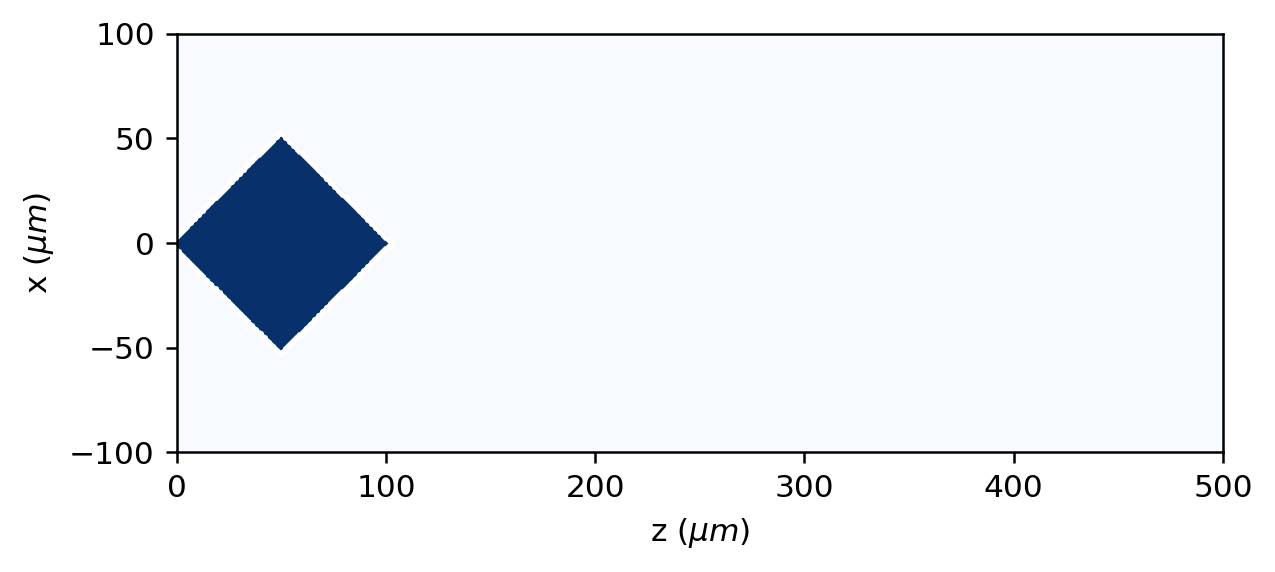

In [88]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.rectangle(r0=(0*um, 50*um),
             size=(75*um, 75*um),
             angle=45*degrees,
             refractive_index=1.5)
u1.draw_refractive_index(scale='scaled')

In [89]:
edges = u1.surface_detection()

**has_edges = False**

Light enteres again. Ripples in the light distribution are produced

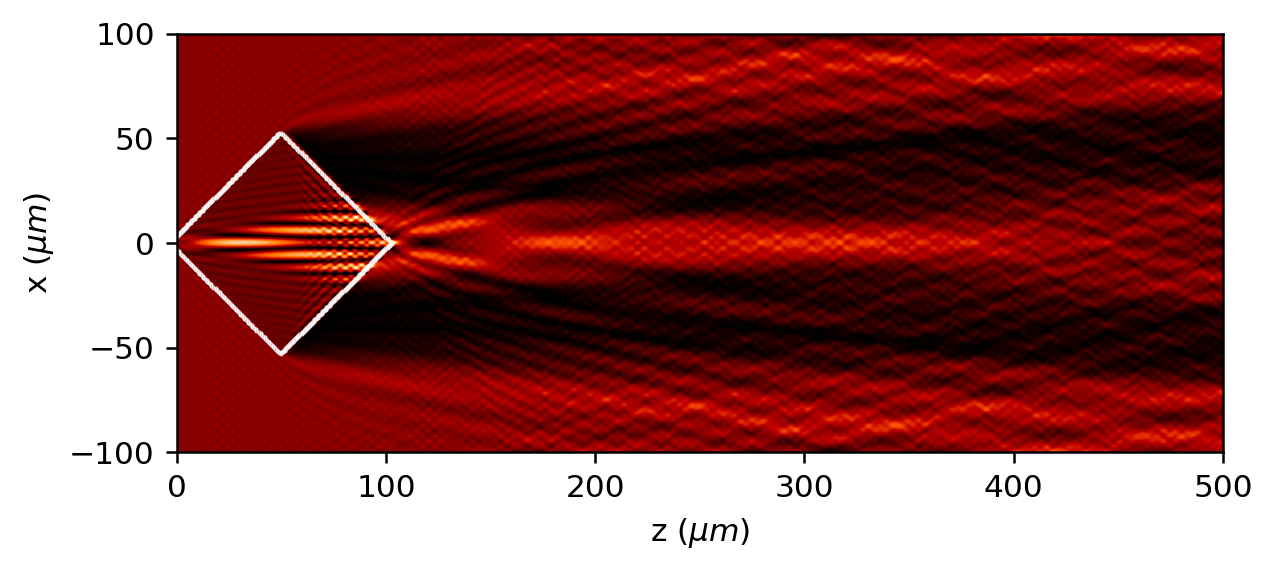

In [91]:
u1.clear_field()
u1.WPM(verbose=False, has_edges=False)
u1.draw(logarithm=True,
        normalize='maximum',
        draw_borders=True,
        edge_matrix=edges,
        scale='scaled')


**has_edges = True**

Light does not enter again, but the incident field is not a plane wave, but a slit.

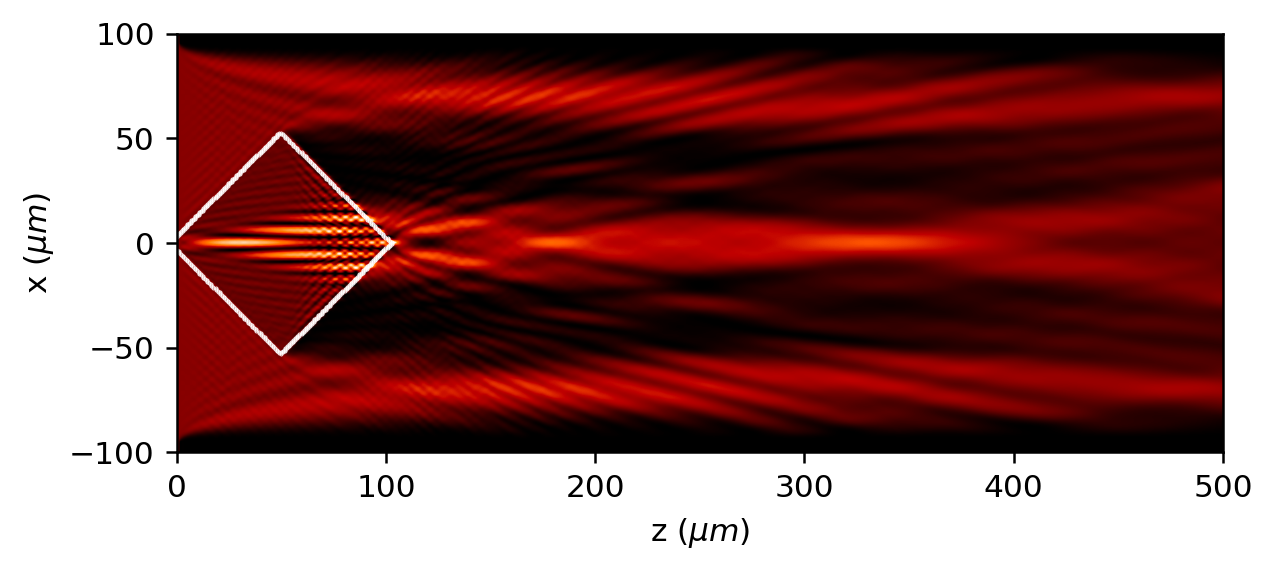

In [95]:
u1.clear_field()
u1.WPM(verbose=False, has_edges=True)
u1.draw(logarithm=True,
        normalize='maximum',
        draw_borders=True,
        edge_matrix=edges,
        scale='scaled')

**has_edges = np.array**

Both effects are avoided. Light is like a plane wave, and lateral light does not enter when diffracted. Ripples are reduced.

In [ ]:
z_edges = np.zeros_like(z0)
z_edges[z0>150]= 1

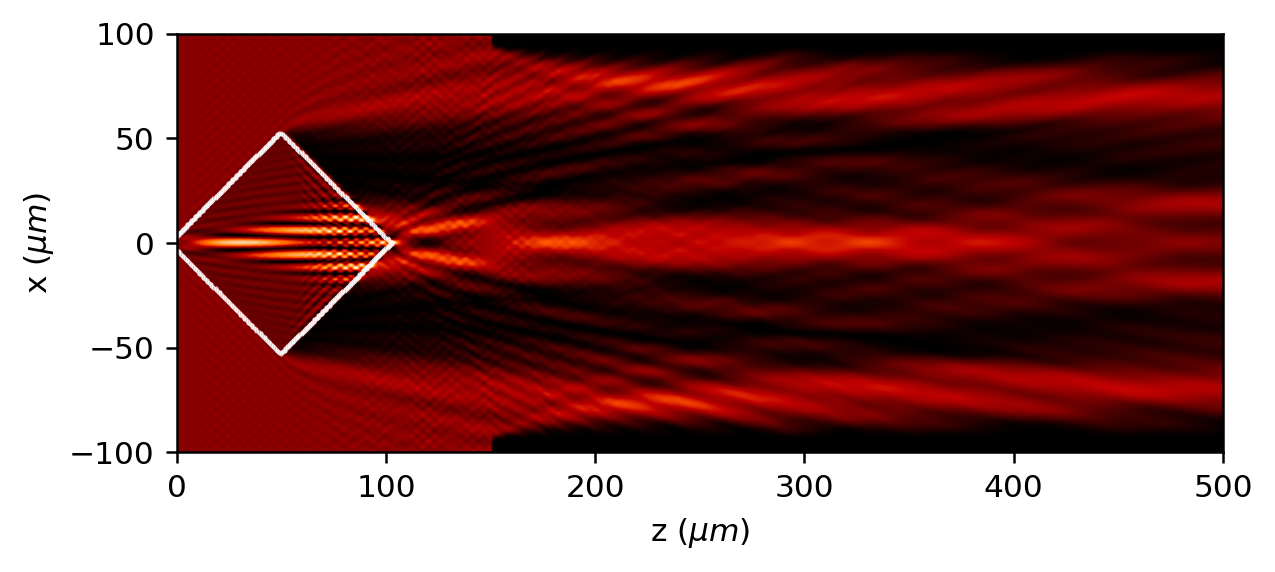

In [93]:
u1.clear_field()
u1.WPM(verbose=False, has_edges=z_edges)
u1.draw(logarithm=True,
        normalize='maximum',
        draw_borders=True,
        edge_matrix=edges,
        scale='scaled')